In [244]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [245]:
#load CSV with data from surveys, convert to pd df
df = pd.read_csv('/Users/jen/Desktop/DataGlacier/Pipers/MasterResults.csv')
df.shape



(42, 7)

In [246]:
#create age bins 
import datetime
today = datetime.datetime.now()
ty =today.year
df['BYbins'] = pd.cut(x=df['birth_year'], bins=[ty -100, ty - 65, ty - 50, ty - 40, ty - 30, ty -20, ty])

In [247]:
#create will_to_improve bins 

df['WTIbins'] = pd.cut(x=df['will_to_improve'], bins=[0, 2, 4, 6, 8, 10])


In [248]:
df.head()

,how_worried,political_leader_involvement,business_leader_involvement,actions_taken_self,will_to_improve,birth_year,source,BYbins,WTIbins
0,NaN,2.0,0.0,['Reduced your carbon footprint by driving and...,7.0,1970.0,typeform,"(1957, 1972]","(6.0, 8.0]"
1,5.0,10.0,5.0,['Reduced your carbon footprint by driving and...,10.0,1997.0,typeform,"(1992, 2002]","(8.0, 10.0]"
2,8.0,2.0,2.0,['Talked about climate change or posted about ...,5.0,1996.0,typeform,"(1992, 2002]","(4.0, 6.0]"
3,0.0,5.0,6.0,['Other'],0.0,1991.0,typeform,"(1982, 1992]",NaN
4,10.0,0.0,0.0,['Decreased your consumption of dairy and/or m...,9.0,1989.0,typeform,"(1982, 1992]","(8.0, 10.0]"


In [249]:
print(df['actions_taken_self'].iat[7])

['Reduced your energy use at home']


In [250]:

#check for Typeform then Survey Monkey responses indicating actions taken by survey responder, create new columns
#'other', 'social', 'wallet_vote', 'complaint_government', 'overall_consumption_recycling', 'home_energy', 'meat_dairy', 'driving_flying']


#add col representing driving less
strdrive1 = 'Reduced your carbon footprint by driving and/or flying less' #typeform
strdrive2 = 'driving_flying'    #surveyMonkey
drive_less = []
for j in range(0,len(df)):
    val =(strdrive1 in str(df['actions_taken_self'].iat[j])) or (strdrive2 in str(df['actions_taken_self'].iat[j]))
    drive_less.append(val)
df['drive_less'] = drive_less 

#add col representing contacting govt leaders
strcomplaint1 = 'Made your concerns about climate change heard by members of your government'   #tf
strcomplaint2 = 'complaint_government'   #sm
write_govt = []
for j in range(0,len(df)):
    val = (strcomplaint1 in str(df['actions_taken_self'].iat[j])) or (strcomplaint2 in str(df['actions_taken_self'].iat[j]))
    write_govt.append(val)
df['write_govt'] = write_govt 


#add col representing reduced home energy use
strreduc1 = 'Reduced your energy use at home' #typeform
strreduc2 = 'home_energy'    #surveymonkey
reduced_energy_home = []
for j in range(0,len(df)):
    val = (strreduc1 in str(df['actions_taken_self'].iat[j])) or (strreduc2 in str(df['actions_taken_self'].iat[j]))
    reduced_energy_home.append(val)
df['reduced_energy_home'] = reduced_energy_home

#add col representing wallet vote regarding business
strwallet1 = "'Voted with your wallet' or in other ways put pressure on businesses to increase their efforts toward environmental sustainability"
strwallet2 = "wallet_vote"   #sm
wallet_vote = []
for j in range(0,len(df)):
    val =(strwallet1 in str(df['actions_taken_self'].iat[j])) or (strwallet2 in str(df['actions_taken_self'].iat[j]))
    wallet_vote.append(val)
df['wallet_vote'] = wallet_vote

#add col representing less meat dairy consumption
strmeat1 = 'Decreased your consumption of dairy and/or meat products'  #tf
strmeat2 = 'meat_dairy'    #sm
less_meat_dairy = []
for j in range(0,len(df)):
    val =(strmeat1 in str(df['actions_taken_self'].iat[j])) or (strmeat2 in str(df['actions_taken_self'].iat[j]))
    less_meat_dairy.append(val)
df['less_meat_dairy'] = less_meat_dairy

#add col representing talking or posting about climate change
strtalked_climate1 = 'Talked about climate change or posted about it on social media'  #typeform
strtalked_climate2 = 'social'  #survey Monkey
talked_climate = []
for j in range(0,len(df)):
    val =(strtalked_climate1 in str(df['actions_taken_self'].iat[j])) or (strtalked_climate2 in str(df['actions_taken_self'].iat[j]))
    talked_climate.append(val)
df['talked_climate'] = talked_climate


In [251]:
#create modified df with outlier and missing age entries removed
dfa = df.query('birth_year > 1900 and birth_year < 2015')
print(len(dfa))
dfa.head()
      

38


,how_worried,political_leader_involvement,business_leader_involvement,actions_taken_self,will_to_improve,birth_year,source,BYbins,WTIbins,drive_less,write_govt,reduced_energy_home,wallet_vote,less_meat_dairy,talked_climate
0,NaN,2.0,0.0,['Reduced your carbon footprint by driving and...,7.0,1970.0,typeform,"(1957, 1972]","(6.0, 8.0]",True,False,True,False,False,False
1,5.0,10.0,5.0,['Reduced your carbon footprint by driving and...,10.0,1997.0,typeform,"(1992, 2002]","(8.0, 10.0]",True,False,True,False,True,False
2,8.0,2.0,2.0,['Talked about climate change or posted about ...,5.0,1996.0,typeform,"(1992, 2002]","(4.0, 6.0]",False,False,False,False,False,True
3,0.0,5.0,6.0,['Other'],0.0,1991.0,typeform,"(1982, 1992]",NaN,False,False,False,False,False,False
4,10.0,0.0,0.0,['Decreased your consumption of dairy and/or m...,9.0,1989.0,typeform,"(1982, 1992]","(8.0, 10.0]",False,True,False,False,True,True


In [252]:
#BAR PLOTS of SINGLE VARIABLE - counts

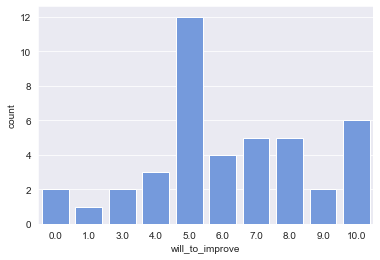

In [253]:
#Counts for will to do more about climate change in coming 12 months
A=df['will_to_improve']
Anan=A[~np.isnan(A)] # Remove the NaNs
sns.countplot(Anan, color = 'cornflowerblue')

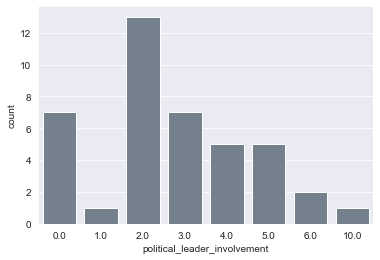

In [254]:
#counts for assessment of govt leader performance
A=df['political_leader_involvement']
Anan=A[~np.isnan(A)] # Remove the NaNs
sns.countplot(Anan, color = 'slategrey')

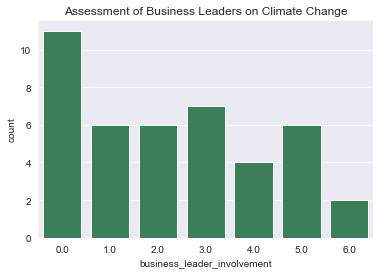

In [255]:
#counts for assessment of Business Leader performance
A=df['business_leader_involvement']
Anan=A[~np.isnan(A)] # Remove the NaNs
sns.countplot(Anan, color = 'seagreen').set_title("Assessment of Business Leaders on Climate Change")
plt.savefig("BL.jpg")



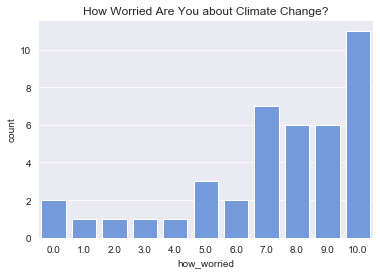

In [256]:
#counts for How Worried
A=df['how_worried']
Anan=A[~np.isnan(A)] # Remove the NaNs
sns.countplot(Anan, color = 'cornflowerblue').set_title("How Worried Are You about Climate Change?")
plt.savefig("HW.jpg")

In [257]:
#Bar Plots continued

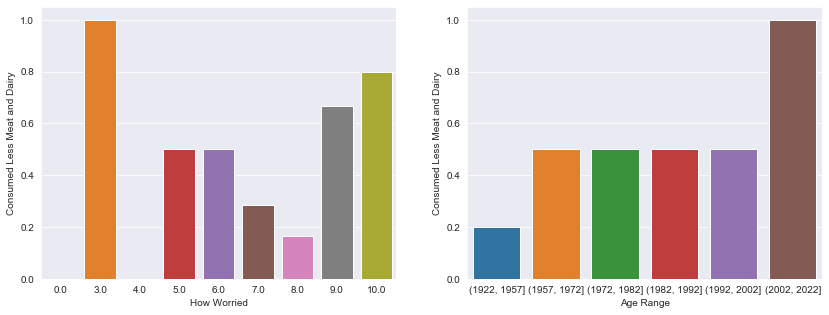

In [258]:
#plot for how worried by eating less milk/meat
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
s1 = sns.barplot(x = 'how_worried', y = 'less_meat_dairy', ci = None, data = dfa, ax = ax[0])
s1.set(xlabel='How Worried', ylabel = 'Consumed Less Meat and Dairy')
s2 = sns.barplot(x = 'BYbins', y = 'less_meat_dairy', ci = None, data = dfa, ax = ax[1])
s2.set(xlabel='Age Range', ylabel = 'Consumed Less Meat and Dairy')
plt.show()
fig.savefig('MD_AGE_Worry.jpg')



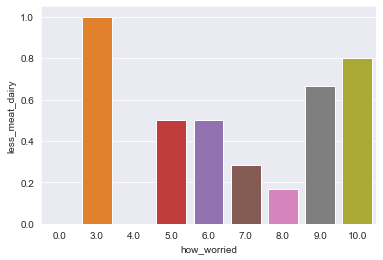

In [259]:
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'less_meat_dairy', ci = None, data = dfa)
plt.show()

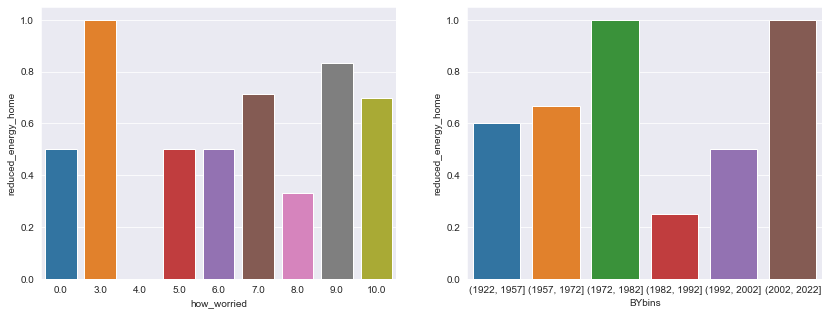

In [260]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'reduced_energy_home', ci = None, data = dfa, ax = ax[0])
sns.barplot(x = 'BYbins', y = 'reduced_energy_home', ci = None, data = dfa, ax = ax[1])
plt.show()

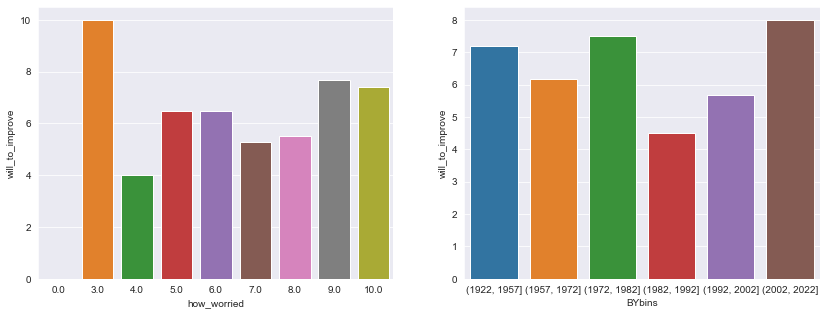

In [261]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'will_to_improve', ci = None, data = dfa, ax = ax[0])
sns.barplot(x = 'BYbins', y = 'will_to_improve', ci = None, data = dfa, ax = ax[1])
plt.show()

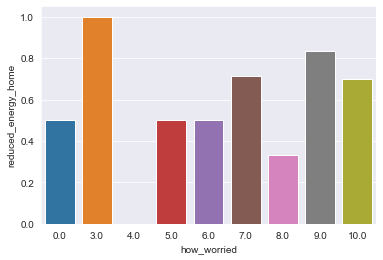

In [262]:
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'reduced_energy_home', ci = None, data = dfa)
plt.show()

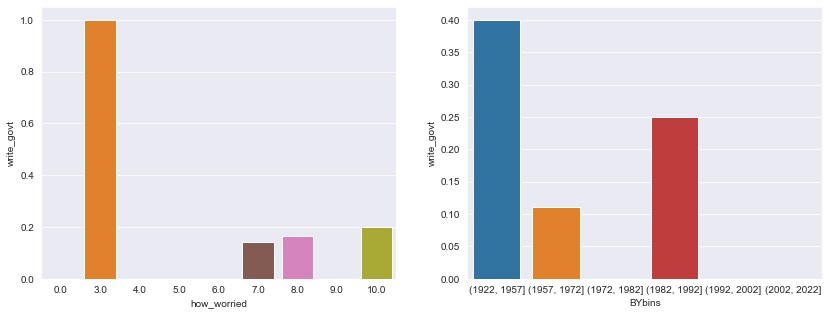

In [263]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'write_govt', ci = None, data = dfa, ax = ax[0])
sns.barplot(x = 'BYbins', y = 'write_govt', ci = None, data = dfa, ax = ax[1])
plt.show()




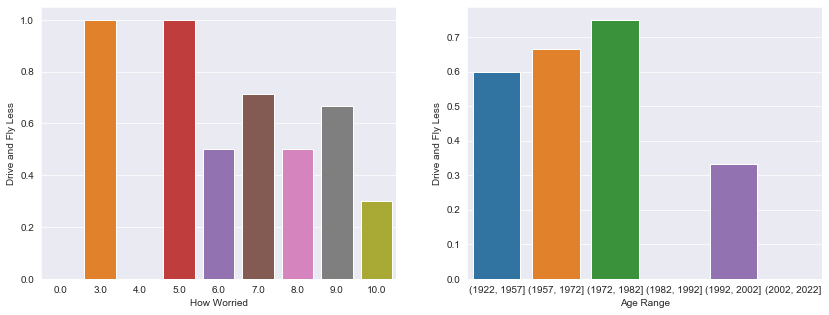

In [264]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
s1 = sns.barplot(x = 'how_worried', y = 'drive_less', ci= None, data = dfa, ax = ax[0])
s1.set(xlabel='How Worried', ylabel = 'Drive and Fly Less')
s2 = sns.barplot(x = 'BYbins', y = 'drive_less', ci = None,  data = dfa, ax = ax[1])
s2.set(xlabel='Age Range', ylabel = 'Drive and Fly Less')

plt.show()
fig.savefig("DriveLess_AgeWorry.jpg")



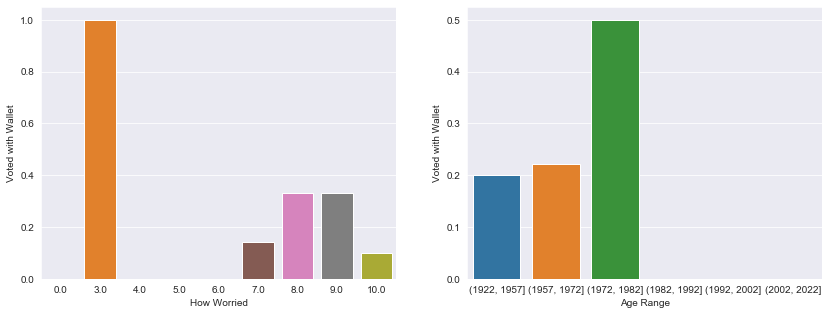

In [265]:
#plot how likely to vote with the wallet by how worried and by age
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
s1=sns.barplot(x = 'how_worried', y = 'wallet_vote', ci = None, data = dfa, ax = ax[0])
s1.set(xlabel='How Worried',
       ylabel='Voted with Wallet')
s2=sns.barplot(x = 'BYbins', y = 'wallet_vote', ci = None, data = dfa, ax = ax[1])
s2.set(xlabel='Age Range',
       ylabel='Voted with Wallet')
plt.show()
fig.savefig('WW_AGE.jpg')



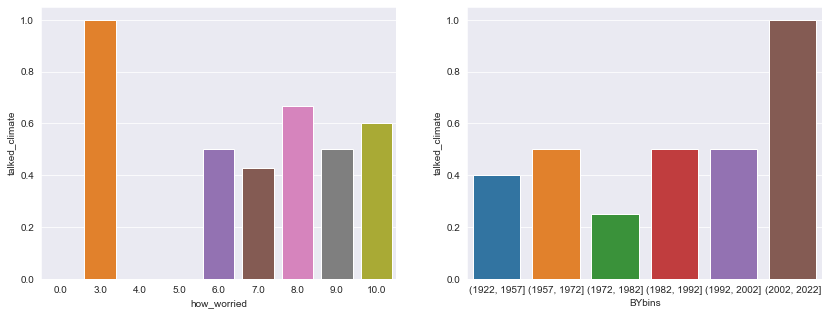

In [266]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'talked_climate', ci = None, data = dfa, ax = ax[0])
sns.barplot(x = 'BYbins', y = 'talked_climate', ci = None, data = dfa, ax = ax[1])
plt.show()



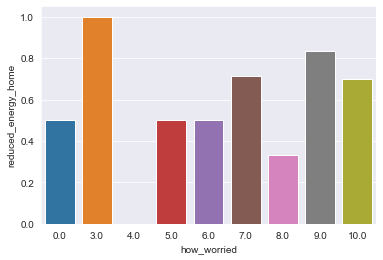

In [267]:
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'reduced_energy_home', ci = None, data = dfa)
plt.show()

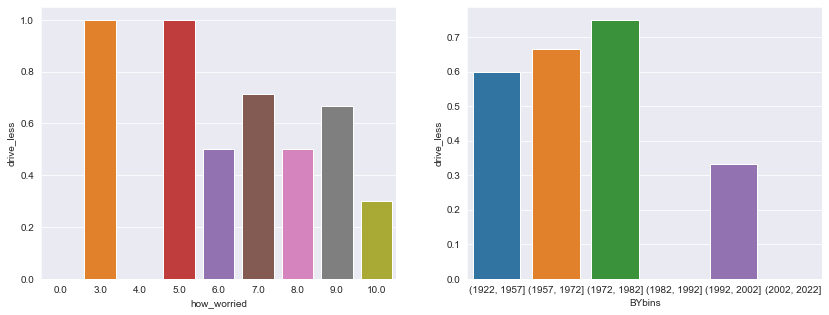

In [268]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'drive_less', ci = None, data = dfa, ax = ax[0])
sns.barplot(x = 'BYbins', y = 'drive_less', ci = None, data = dfa, ax = ax[1])
plt.savefig('Driving Less by How Worried and by Age.jpg')
plt.show()

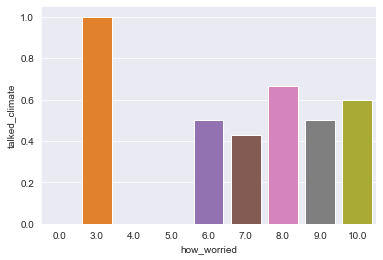

In [269]:
sns.set_style('darkgrid')
sns.barplot(x = 'how_worried', y = 'talked_climate', ci = None, data = dfa)
plt.show()

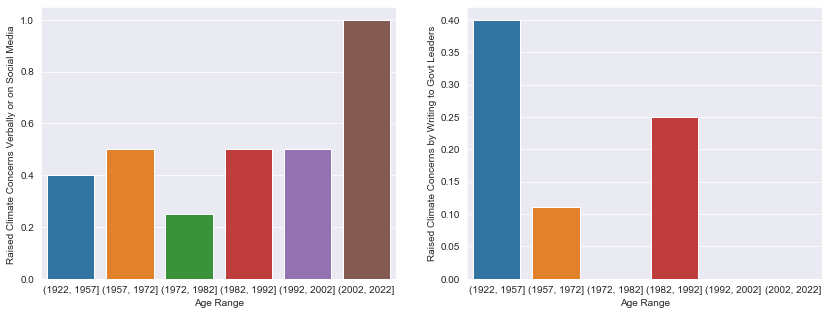

In [270]:
fig, ax =plt.subplots(1,2) 
fig.set_size_inches(14, 5)
sns.set_style('darkgrid')
s1 =sns.barplot(x = 'BYbins', y = 'talked_climate', ci = None, data = dfa, ax = ax[0])
s1.set(xlabel='Age Range',
       ylabel='Raised Climate Concerns Verbally or on Social Media ')
s2 =sns.barplot(x = 'BYbins', y = 'write_govt', ci = None, data = dfa, ax = ax[1])
s2.set(xlabel='Age Range',
       ylabel='Raised Climate Concerns by Writing to Govt Leaders')
fig.savefig('TalkedCLimate_Wrote Govt by age.jpg')
plt.show()

In [271]:
#Nested Bar Plots

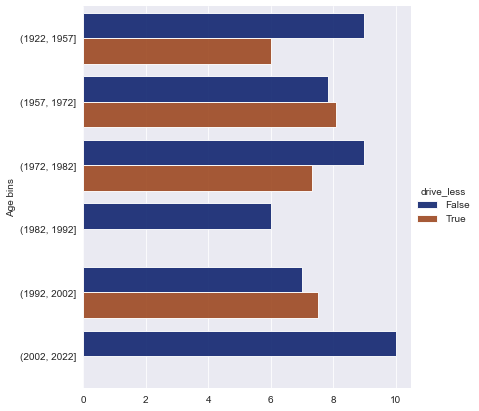

In [272]:

# Draw a nested barplot by how worried and age
g = sns.catplot(
    data=dfa, kind="bar",
    x="how_worried", y="BYbins", hue="drive_less",
    ci=None, palette="dark", alpha=.9, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Age bins")




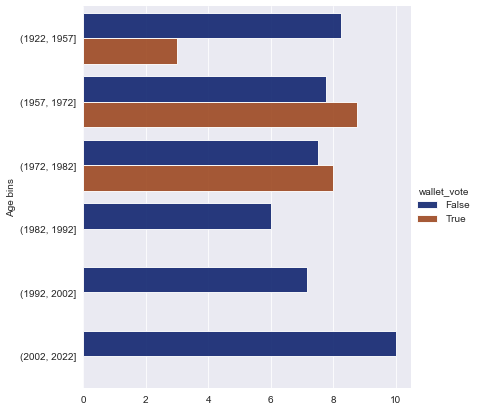

In [273]:
# Draw a nested barplot by how worried and age
g = sns.catplot(
    data=dfa, kind="bar",
    x="how_worried", y="BYbins", hue="wallet_vote",
    ci=None, palette="dark", alpha=.9, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Age bins")


In [274]:
#SCATTER PLOTS

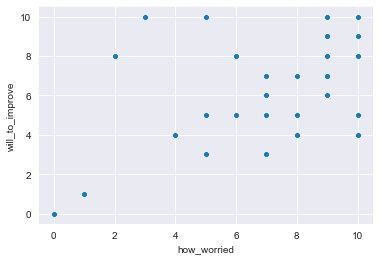

In [275]:
sns.scatterplot(data = df, y = 'will_to_improve', x = 'how_worried', x_jitter=4, y_jitter=4)

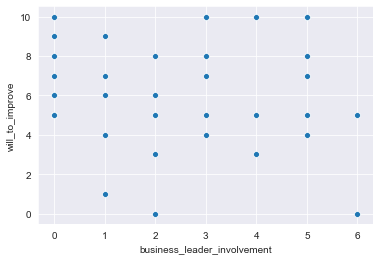

In [276]:
sns.scatterplot(data = df, y = 'will_to_improve', x = 'business_leader_involvement', x_jitter=4, y_jitter=4)

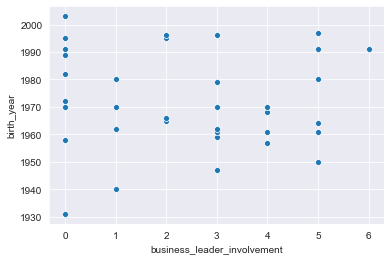

In [277]:
sns.scatterplot(data = dfa, y = 'birth_year', x = 'business_leader_involvement', x_jitter=4, y_jitter=4)

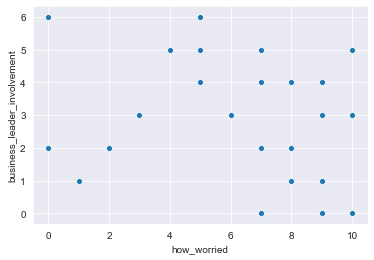

In [278]:
sns.scatterplot(data = df, y = 'business_leader_involvement', x = 'how_worried', x_jitter=4, y_jitter=4)

In [279]:
SEABORN DISTRIBUTION PLOTS

SyntaxError: invalid syntax (<ipython-input-279-16d37d73e86b>, line 1)

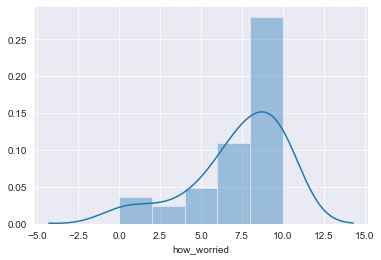

In [280]:

A=df['how_worried']
Anan=A[~np.isnan(A)] # Remove the NaNs

sns.distplot(Anan,hist=True)


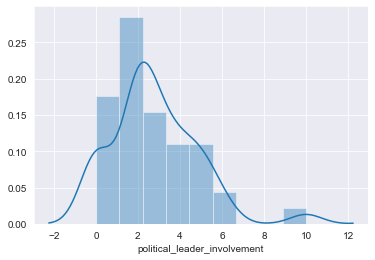

In [281]:

A=df['political_leader_involvement']
Anan=A[~np.isnan(A)] # Remove the NaNs

sns.distplot(Anan,hist=True)

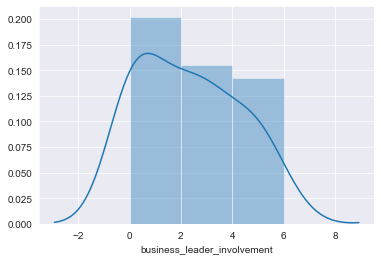

In [282]:

A=df['business_leader_involvement']
Anan=A[~np.isnan(A)] # Remove the NaNs

sns.distplot(Anan,hist=True)

In [283]:
#Produce output image of describe() applied to dataframe dfa

#import package for saving output image from describe()
import dataframe_image as dfi
dfi.export(dfa.describe(), 'describe.png')
